In [1]:
#list of useful libraries required for the project
import os
import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
from glob import glob
import seaborn as sns
import random
from keras.preprocessing import image
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,GlobalAvgPool2D,GlobalMaxPooling2D
from keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = !unrar x /content/drive/MyDrive/DIABETIC_RETINOPATHY.rar

In [2]:
data=r'/content/DIABETIC_RETINOPATHY'

In [3]:
images=[]
import os
for dirname,_,filenames in os.walk(data):
  for filename in filenames:
    file_name, file_extension = os.path.splitext(filename)
    if file_extension == '.db':
      continue
    else:
      img=os.path.join(dirname,filename)
      images.append(img)

In [4]:
images[:20]

['/content/DIABETIC_RETINOPATHY/No_DR/17111_left.jpeg',
 '/content/DIABETIC_RETINOPATHY/No_DR/26274_right.jpeg',
 '/content/DIABETIC_RETINOPATHY/No_DR/30888_right.jpeg',
 '/content/DIABETIC_RETINOPATHY/No_DR/40582_right.jpeg',
 '/content/DIABETIC_RETINOPATHY/No_DR/18807_right.jpeg',
 '/content/DIABETIC_RETINOPATHY/No_DR/33740_left.jpeg',
 '/content/DIABETIC_RETINOPATHY/No_DR/35503_right.jpeg',
 '/content/DIABETIC_RETINOPATHY/No_DR/30911_right.jpeg',
 '/content/DIABETIC_RETINOPATHY/No_DR/41279_left.jpeg',
 '/content/DIABETIC_RETINOPATHY/No_DR/21103_left.jpeg',
 '/content/DIABETIC_RETINOPATHY/No_DR/41414_left.jpeg',
 '/content/DIABETIC_RETINOPATHY/No_DR/22855_left.jpeg',
 '/content/DIABETIC_RETINOPATHY/No_DR/35598_right.jpeg',
 '/content/DIABETIC_RETINOPATHY/No_DR/30803_right.jpeg',
 '/content/DIABETIC_RETINOPATHY/No_DR/44339_left.jpeg',
 '/content/DIABETIC_RETINOPATHY/No_DR/35571_right.jpeg',
 '/content/DIABETIC_RETINOPATHY/No_DR/25413_left.jpeg',
 '/content/DIABETIC_RETINOPATHY/No_DR/1

In [5]:
len(images)

35126

In [6]:
class_values = []
for i in images:
    j = i.split('/')
    class_values.append(j[-2])

In [7]:
class_values[:10]

['No_DR',
 'No_DR',
 'No_DR',
 'No_DR',
 'No_DR',
 'No_DR',
 'No_DR',
 'No_DR',
 'No_DR',
 'No_DR']

In [8]:
len(class_values)

35126

In [9]:
import random # Import the random module at the beginning of the cell
temp = list(zip(images,class_values))
random.shuffle(temp)
images, class_values = zip(*temp)
data = pd.DataFrame(list(zip(images, class_values)), columns=['image_path', 'Class_label'])

In [10]:
data

,image_path,Class_label
0,/content/DIABETIC_RETINOPATHY/Moderate/7051_ri...,Moderate
1,/content/DIABETIC_RETINOPATHY/No_DR/32055_righ...,No_DR
2,/content/DIABETIC_RETINOPATHY/No_DR/26747_righ...,No_DR
3,/content/DIABETIC_RETINOPATHY/No_DR/13495_righ...,No_DR
4,/content/DIABETIC_RETINOPATHY/No_DR/6490_right...,No_DR
...,...,...
35121,/content/DIABETIC_RETINOPATHY/No_DR/2785_right...,No_DR
35122,/content/DIABETIC_RETINOPATHY/No_DR/25242_righ...,No_DR
35123,/content/DIABETIC_RETINOPATHY/No_DR/31742_righ...,No_DR
35124,/content/DIABETIC_RETINOPATHY/No_DR/7088_right...,No_DR


In [11]:
data.shape

(35126, 2)

In [12]:
data.Class_label.value_counts()

,count
Class_label,
No_DR,25810
Moderate,5292
Mild,2443
Severe,873
Proliferate_DR,708


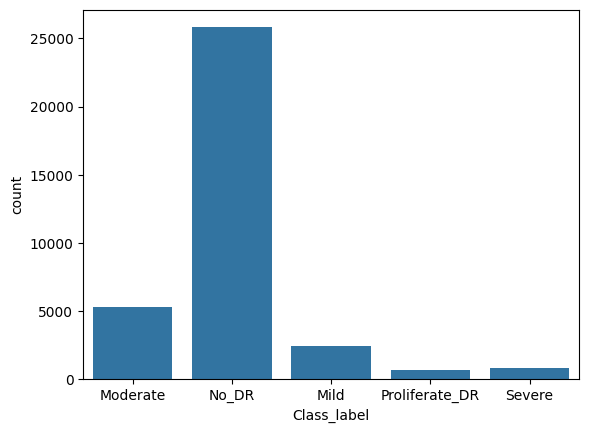

In [13]:
sns.countplot(x = data.Class_label, data = data)
plt.show()

In [14]:
from sklearn.utils import resample
df_c0 = data[data['Class_label'] =="No_DR"]
df_c1 = data[data['Class_label'] =="Moderate"]
df_c2 = data[data['Class_label'] =="Mild"]
df_c3 = data[data['Class_label'] =="Severe"]
df_c4 = data[data['Class_label'] =="Proliferate_DR"]

unsampled_df_c0 = resample(df_c0, replace=True, random_state=23, n_samples=3000)
unsampled_df_c1 = resample(df_c1, replace=True, random_state=23, n_samples=3000)
unsampled_df_c2 = resample(df_c2, replace=True, random_state=23, n_samples=3000)
unsampled_df_c3 = resample(df_c3, replace=True, random_state=23, n_samples=3000)
unsampled_df_c4 = resample(df_c4, replace=True, random_state=23, n_samples=3000)

df_unsampled = pd.concat([unsampled_df_c0, unsampled_df_c1,unsampled_df_c2,unsampled_df_c3,unsampled_df_c4])
df_unsampled

,image_path,Class_label
11968,/content/DIABETIC_RETINOPATHY/No_DR/36655_righ...,No_DR
12572,/content/DIABETIC_RETINOPATHY/No_DR/40611_left...,No_DR
15226,/content/DIABETIC_RETINOPATHY/No_DR/13854_righ...,No_DR
13192,/content/DIABETIC_RETINOPATHY/No_DR/494_right....,No_DR
8427,/content/DIABETIC_RETINOPATHY/No_DR/8514_right...,No_DR
...,...,...
19852,/content/DIABETIC_RETINOPATHY/Proliferate_DR/2...,Proliferate_DR
23743,/content/DIABETIC_RETINOPATHY/Proliferate_DR/3...,Proliferate_DR
12801,/content/DIABETIC_RETINOPATHY/Proliferate_DR/4...,Proliferate_DR
27770,/content/DIABETIC_RETINOPATHY/Proliferate_DR/1...,Proliferate_DR


In [15]:
df_unsampled.Class_label.value_counts()

,count
Class_label,
No_DR,3000
Moderate,3000
Mild,3000
Severe,3000
Proliferate_DR,3000


In [16]:
df = df_unsampled.sample(frac=1)
df.shape

(15000, 2)

In [17]:
import os
from PIL import Image

In [18]:
def resize_images(img):
  file = Image.open(img)
  img = file.convert('RGB')
  img_bgr= img.resize((124, 124))
  img_bgr = np.array(img_bgr)
  return img_bgr

In [19]:
#save resized images into images.
images = [resize_images(img) for img in df['image_path']]

In [20]:
images

[array([[[1, 1, 1],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [1, 1, 1]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 

In [21]:
# print number of classes in our dataset
num_classes = len(np.unique(data['Class_label']))

In [22]:
num_classes

5

In [23]:
# save the class into class_names
class_names = list(data['Class_label'])

In [24]:
# Print the shape of the image
images[0].shape

(124, 124, 3)

Text(0.5, 1.0, 'No_DR')

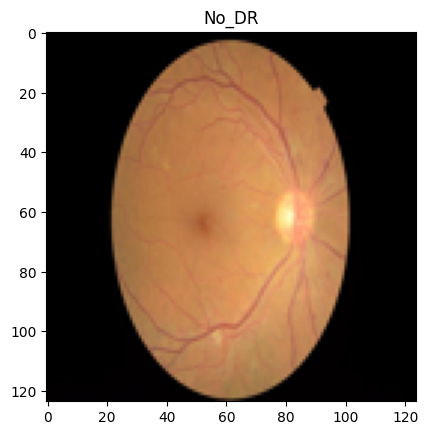

In [25]:
#See the image with class label
plt.imshow(images[20])
plt.title(class_names[20])

Text(0.5, 1.0, 'No_DR')

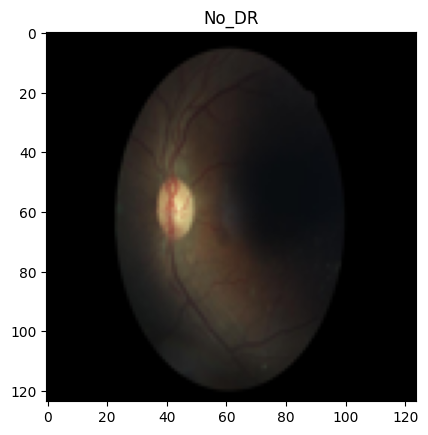

In [26]:
#See the image with class label
plt.imshow(images[250])
plt.title(class_names[250])

In [27]:
# Convert the images into array
images =  np.array(images)

In [28]:
# Shape of the images
images.shape

(15000, 124, 124, 3)

In [29]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
Y = enc.fit_transform(df['Class_label'])
from keras.utils  import to_categorical
y = to_categorical(Y)

In [30]:
enc.classes_

array(['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe'],
      dtype=object)

In [31]:
y[:10]

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [32]:
y.shape

(15000, 5)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.3,stratify = y,random_state=42)

In [34]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Load Data
train_generator = train_datagen.flow(
    X_train, y_train, batch_size=100, shuffle=True
)

valid_generator = test_datagen.flow(
    X_test, y_test, batch_size=100, shuffle=False
)

# Compute Class Weights
y_train_classes = np.argmax(y_train, axis=1)
class_weights = dict(enumerate(
    np.bincount(y_train_classes).max() / np.bincount(y_train_classes)
))

# Load DenseNet121 Model
densenet_base = DenseNet121(
    weights="imagenet", include_top=False, input_shape=(124, 124, 3)
)

# Custom Layers
x = densenet_base.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
predictions = Dense(5, activation="softmax")(x)

model = Model(inputs=densenet_base.input, outputs=predictions)

# Freeze Base Model Layers
for layer in densenet_base.layers[:-20]:
    layer.trainable = False

# Compile Model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Callbacks
early_stop = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=3, min_lr=1e-6)

# Fine-Tuning - Unfreeze All Layers
for layer in densenet_base.layers:
    layer.trainable = True

# Recompile with Lower Learning Rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Fine-Tuning
history_fine = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=40,
    class_weight=class_weights,
    callbacks=[early_stop, reduce_lr]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
105/105 ━━━━━━━━━━━━━━━━━━━━ 243s 631ms/step - accuracy: 0.2206 - loss: 2.2228 - val_accuracy: 0.2262 - val_loss: 1.8135 - learning_rate: 1.0000e-05
Epoch 2/40
105/105 ━━━━━━━━━━━━━━━━━━━━ 53s 506ms/step - accuracy: 0.3022 - loss: 1.8588 - val_accuracy: 0.2849 - val_loss: 1.6660 - learning_rate: 1.0000e-05
Epoch 3/40
105/105 ━━━━━━━━━━━━━━━━━━━━ 54s 509ms/step - accuracy: 0.3395 - loss: 1.6970 - val_accuracy: 0.3404 - val_loss: 1.5359 - learning_rate: 1.0000e-05
Epoch 4/40
105/105 ━━━━━━━━━━━━━━━━━━━━ 54s 515ms/step - accuracy: 0.3675 - loss: 1.5896 - val_accuracy: 0.3644 - val_loss: 1.4495 - learning_rate: 1.0000e-05
Epoch 5/40
105/105 ━━━━━━━━━━━━━━━━━━━━ 54s 509ms/step - accuracy: 0.3827 - loss: 1.5443 - val_accuracy: 0.3998 - val_loss: 1.3828 - learning_rate: 1.0000e-05
Epoch 6/40
105/105 ━━━━━━━━━━━━━━━━━━━━ 53s 507ms/step - accuracy: 0.4130 - loss: 1.4614 - val_accuracy: 0.4167 - val_loss: 1.3451 - learning_rate: 1.0000e-05
Epoch 7/40
105/105 ━━━━━━━━━━━━━━━━━━━━ 53s 5

In [35]:
model.save("mode.h5")

In [36]:
# Evaluate the model
loss, accuracy = model.evaluate(valid_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.6021 - loss: 0.9589
Validation Accuracy: 60.18%


In [37]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Predict on the validation data
y_pred = model.predict(valid_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

# Access true labels from y_test
y_true_classes = np.argmax(y_test, axis=1)  # True class labels

# Print classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=enc.classes_))

45/45 ━━━━━━━━━━━━━━━━━━━━ 16s 71ms/step
Classification Report:
                precision    recall  f1-score   support

          Mild       0.48      0.55      0.51       900
      Moderate       0.44      0.35      0.39       900
         No_DR       0.45      0.53      0.49       900
Proliferate_DR       0.93      0.80      0.86       900
        Severe       0.77      0.78      0.78       900

      accuracy                           0.60      4500
     macro avg       0.61      0.60      0.60      4500
  weighted avg       0.61      0.60      0.60      4500



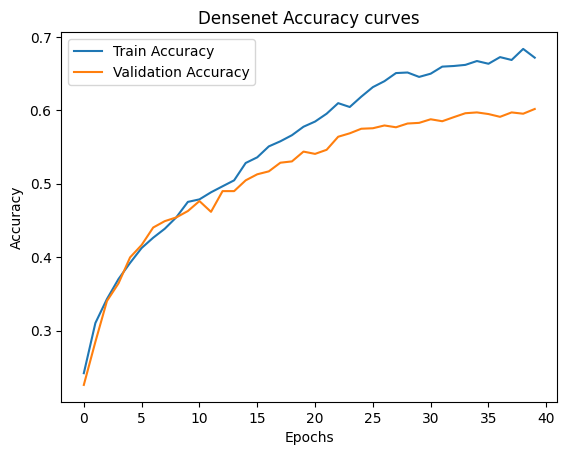

In [38]:
# Plot training and validation accuracy
plt.plot(history_fine.history["accuracy"], label="Train Accuracy")
plt.plot(history_fine.history["val_accuracy"], label="Validation Accuracy")
plt.title("Densenet Accuracy curves")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

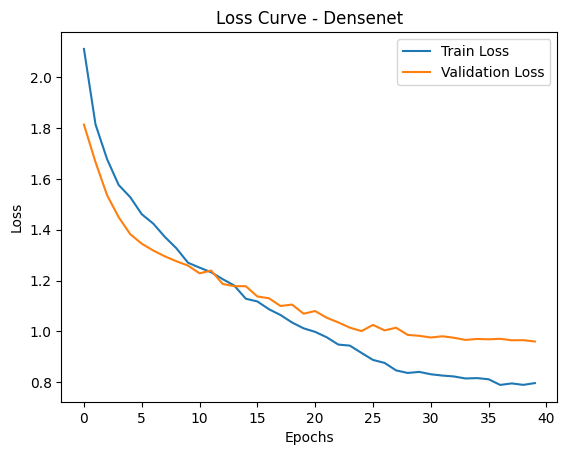

In [39]:
# Loss Plot
plt.plot(history_fine.history['loss'], label='Train Loss')
plt.plot(history_fine.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve - Densenet')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step


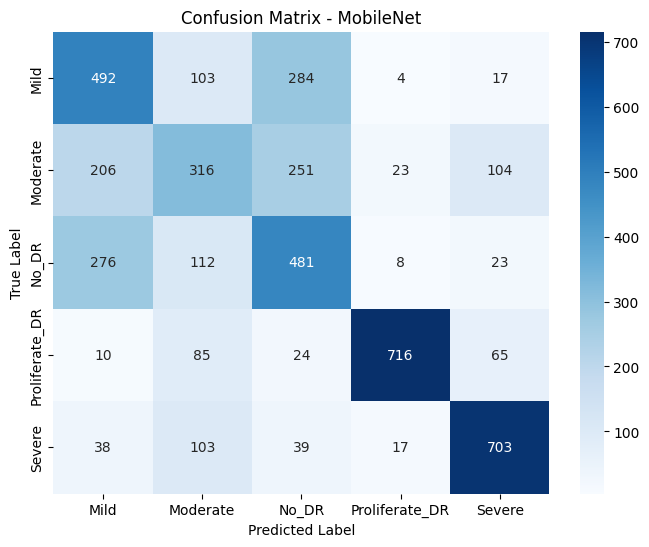

In [40]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict on the validation data
y_pred = model.predict(valid_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

# Access true labels from y_test
y_true_classes = np.argmax(y_test, axis=1)  # True class labels

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=enc.classes_,  # Use enc.classes_ for class names
    yticklabels=enc.classes_,  # Use enc.classes_ for class names
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - MobileNet")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Predicted class: No_DR
Actual class: No_DR


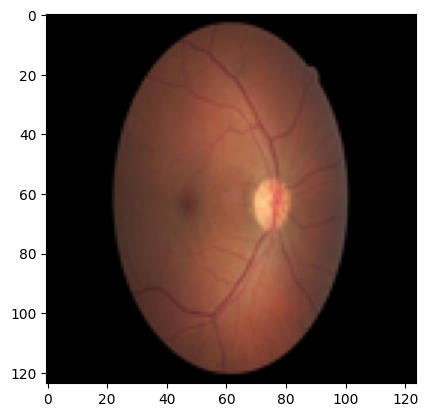

In [43]:
i = 1
pred = np.argmax(model.predict(np.array([X_test[i]]))[0])
act = np.argmax(y_test[i])
print("Predicted class: {}".format(enc.classes_[pred]))
print("Actual class: {}".format(enc.classes_[act]))
plt.imshow(X_test[i])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted class: No_DR
Actual class: No_DR


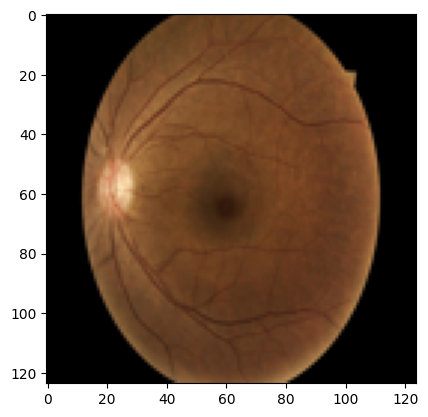

In [51]:
i = 2
pred = np.argmax(model.predict(np.array([X_test[i]]))[0])
act = np.argmax(y_test[i])
print("Predicted class: {}".format(enc.classes_[pred]))
print("Actual class: {}".format(enc.classes_[act]))
plt.imshow(X_test[i])

In [54]:
import tensorflow as tf
print(tf.__version__)

2.18.0
